In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

# Задание

Цель: изучить применение модели логистической регрессии и метода опорных векторов в задаче бинарной классификации.

Описание задания:
В домашнем задании нужно решить задачу классификации физических лиц по уровню дохода. Данные для обучения модели хранятся в файле adult.csv, который можно найти в материалах к занятию или скачать с сайта.

Целевая переменная – уровень дохода income, который принимает два значения <=50K и >50K, поэтому классификация бинарная. Остальные признаки описывают персональную информацию – возраст, образование, семейное положение и т. д. Подробное описание признаков и их возможные значения можно получить самостоятельно, используя функции Python3 для анализа датасета (describe, unique и т.д) или прочитать информацию по ссылке.

Задачу классификации нужно решить при помощи обучения модели логистической регрессии и модели опорных векторов.

Этапы работы:

<br>Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)
<br>Проведите первичный анализ.
<br>Проверьте данные на пропуски. Удалите в случае обнаружения.
<br>Предложите альтернативный способ работы с пропусками
<br>Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно <br>сделать вывод об особенностях датасета/класса/признака)
<br>Преобразуйте категориальные признаки.
<br>Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.
<br>Обучите модели логистической регрессии и опорных векторов на обучающем множестве.
<br>Для тестового множества предскажите уровень дохода и сравните с истинным значением, посчитав точность предсказания моделей. Для <br>этого используйте встроенную функцию score.
<br>Сформулируйте выводы по проделанной работе.
<br>Кратко опишите какие преобразования были сделаны с данными.
<br>Сравните точность двух моделей.
<br>Напишите свое мнение, в полной ли мере модели справились с поставленной задачей. *Что по вашему мнению нужно сделать, чтобы улучшить результат ?
<br>Для получение зачета по этому домашнему заданию, минимально, должно быть реализовано обучение двух моделей классификации, выведена их точность.

# Импортируем датасет с github

In [2]:
url = r'https://raw.githubusercontent.com/miracurue/Adult_project/main/adult.csv'
#url = r"D:\КУРСЫ\НЕТОЛОГИЯ\МАШИННОЕ ОБУЧЕНИЕ\1\Лекция_2\Лекция_2\adult.csv"

In [3]:
df = pd.read_csv(url, sep=',')

In [4]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# Пропуски

Пропущенные данные есть в колонках native-country, occupation и workclass, там они заполнены символом "?".
В колонках capital-gain и capital-loss много нулей: пока не понятно, это пропуски заполнены нулями или это какое-то смысловое значение.

Создадим датафрейм с пропущенными значениями  в 'occupation' и 'workclass'
Пропуски по этим колонкам находятся почти в одних и тех же строках (подавляющее большинство пересекается)

In [5]:
df2 = df[(df['occupation']=='?')|(df['workclass']=='?')].copy()

# Сравним визуально распределения в двух таблицах. 
Посмотрим, какое распределение имеют значения в полном датасете df и в таблице с пропущенными значениями (df2), чтобы убедиться в случайности пропусков.

In [55]:
# оставим для построения графиков только колонки с категориальными данными, исключим колонки с пропущенными данными:
# workclass и occupation, а так же исключим колонки capital-gain и capital-loss.

columns = ['age', 'education',
       'marital-status', 'relationship', 'race', 'gender',
       'hours-per-week', 'native-country']

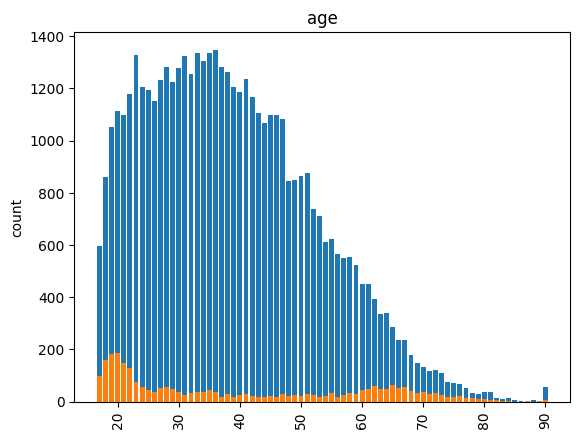

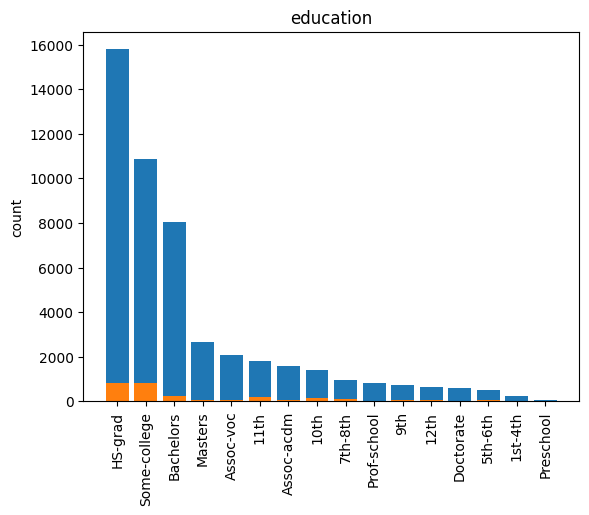

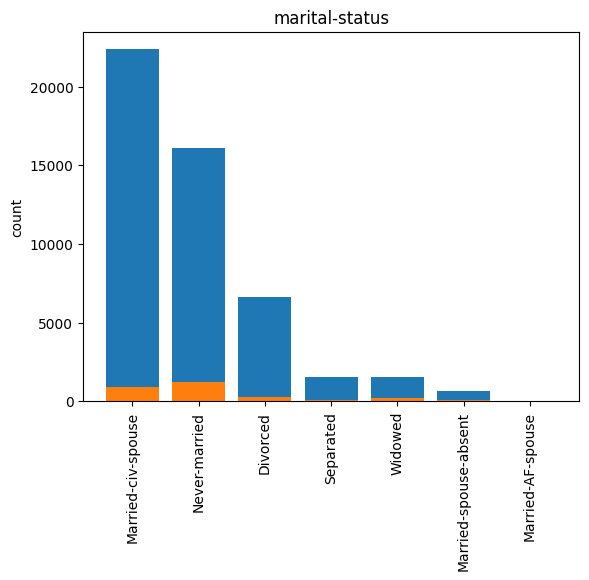

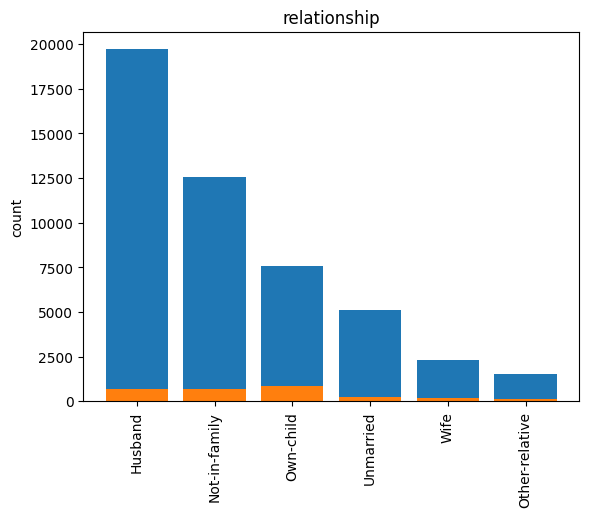

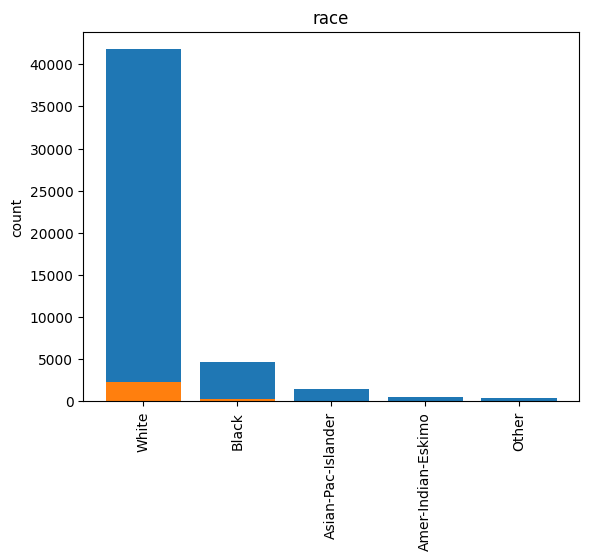

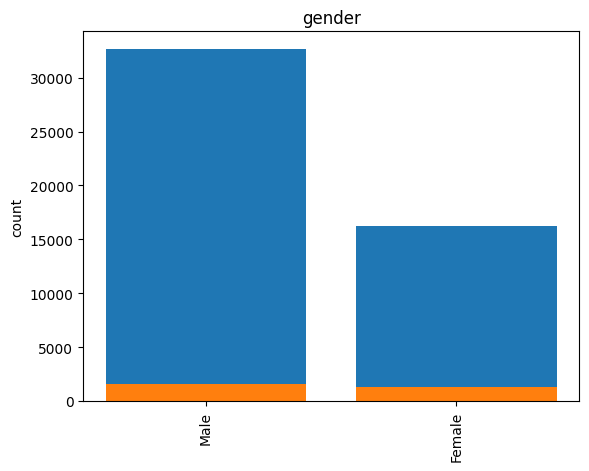

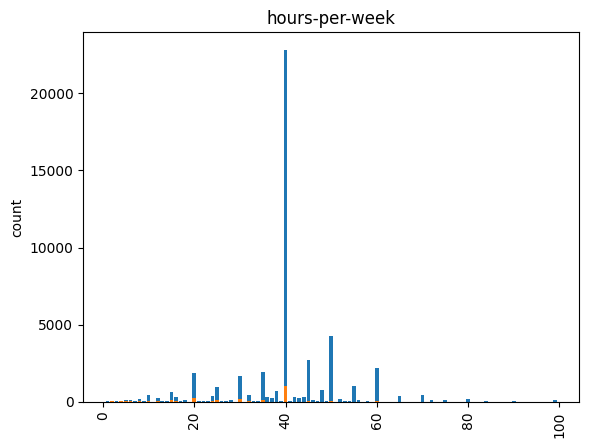

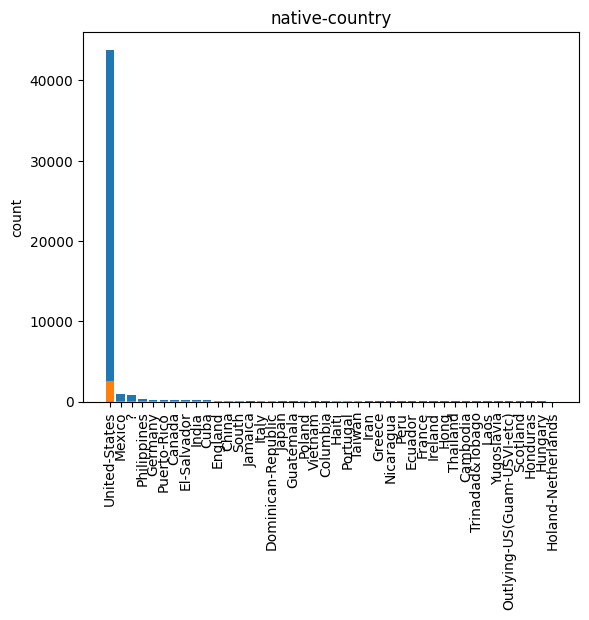

In [56]:
# Напишем цикл, чтобы посмотреть графики сразу по всем колонкам

for column in columns:

    # в переменные x и x2 поместим уникальные значения каждой колонки,
    # а в y и y2 - их количество

    x = df[column].value_counts().index
    y = df[column].value_counts().values
    x2 = df2[column].value_counts().index
    y2 = df2[column].value_counts().values

    fig, ax = plt.subplots()
    plt.bar(x=x, height=y)
    plt.bar(x=x2, height=y2)

    plt.ylabel('count')
    plt.title(column)

    plt.xticks(rotation=90)

    plt.show()